<a href="https://colab.research.google.com/github/yl540016/PortfolioProjects/blob/main/WineQualityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Can we build the "best" model by eliminating  variables?

##### Use multiple regression model & testing of each variable (0-10) for their contribution to predicted quality
##### i.e. does any ß = 0?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.precision', 2)
plt.rcParams["figure.figsize"] = (20,10)
sns.set_theme(style='whitegrid',palette="RdYlGn_r")
import statsmodels.api as sm

In [2]:
raw = pd.read_csv('wine.csv')
df = raw.copy()

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,res_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulph,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


In [4]:
# data shows no null values, with a total of 1599 rows and 12 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   res_sugar             1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulph                 1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


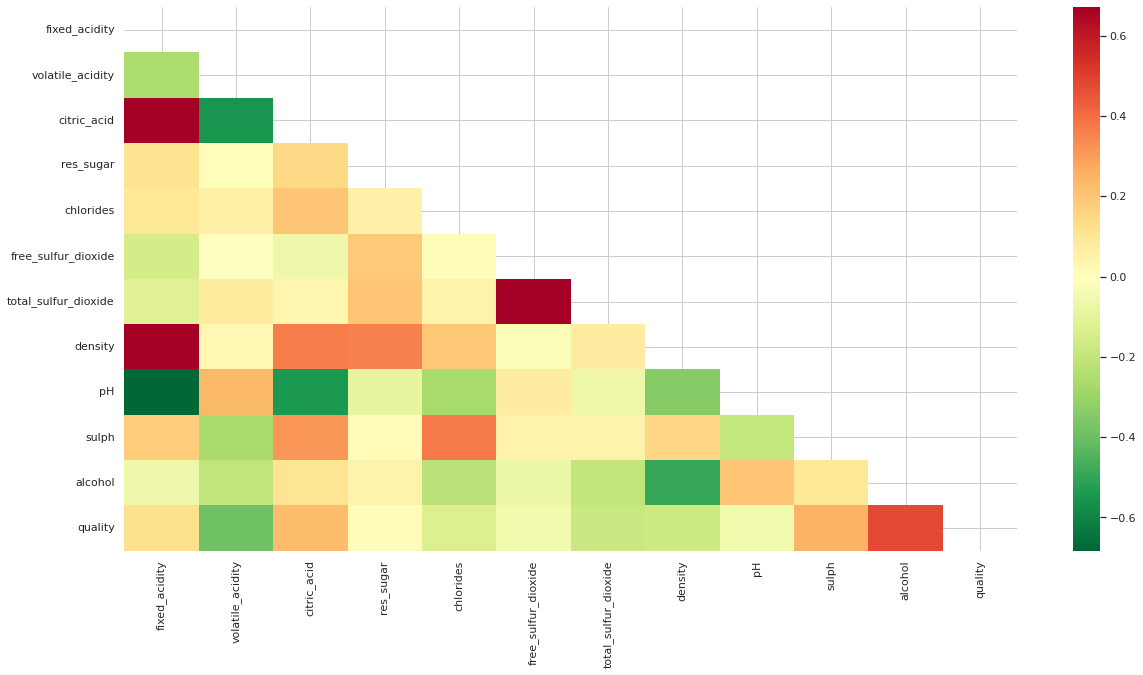

In [5]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
corrs = sns.heatmap(data=df.corr(),mask=mask,cmap='RdYlGn_r')

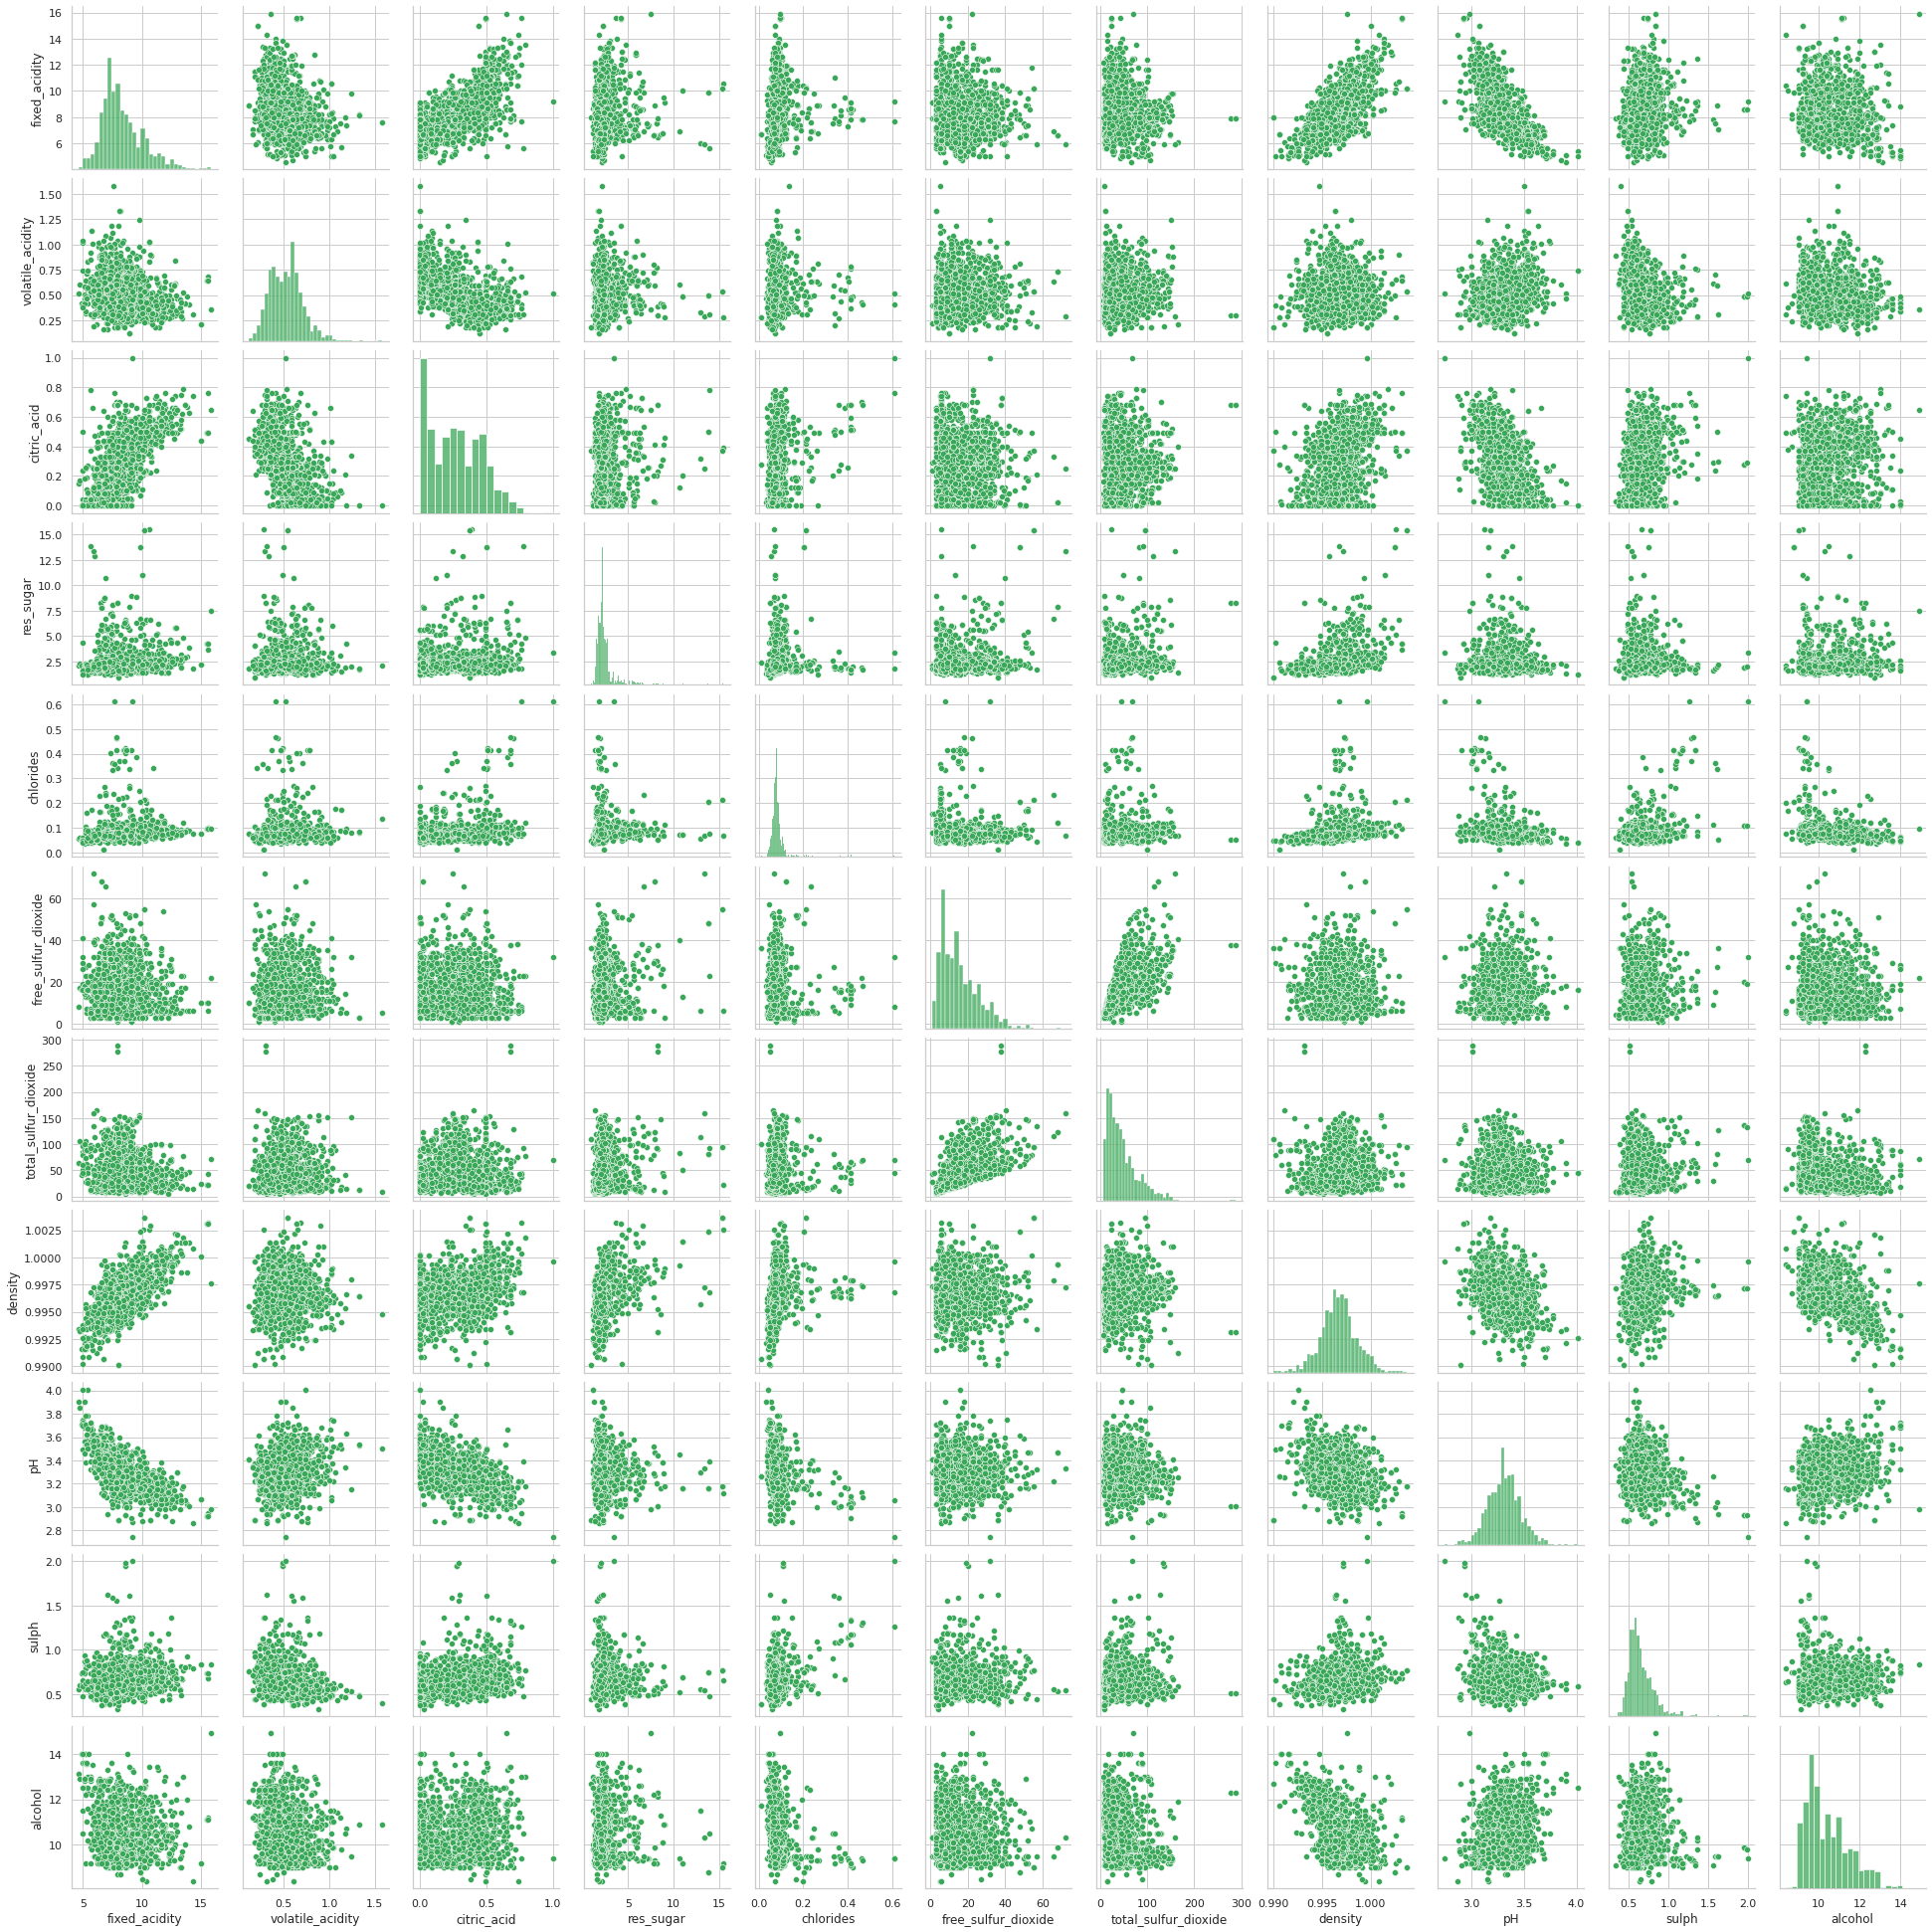

In [6]:
sns.pairplot(data=df.iloc[:,:-1])

In [7]:
x = df.iloc[:,:-1]
y = df.quality
x = sm.add_constant(x)

In [8]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          1.79e-145
Time:                        03:40:12   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed_acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile_acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric_acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
res_sugar                0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free_sulfur_dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total_sulfur_dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulph                    0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# create p-values dataframe to see which x_vars are statistically significant
sig = 0.05
sigs_df = pd.DataFrame(data=round(model.pvalues, 4), columns={'p-value': model.pvalues})
sigs_df['significance'] = sigs_df.iloc[:, 0] < sig


In [12]:
sigs_df

,p-value,significance
const,0.30,False
fixed_acidity,0.34,False
volatile_acidity,0.00,True
citric_acid,0.21,False
res_sugar,0.28,False
chlorides,0.00,True
free_sulfur_dioxide,0.04,True
total_sulfur_dioxide,0.00,True
density,0.41,False
pH,0.03,True


### Examine the relationship of the chemical component variables and wine quality while predicting the wine quality score based on the variable relationships.

In [13]:
# p-value of variable in simple linear regression for each column vs. quality
# 95% CI, 5% significance
sig = .05
p_vals = [round(sm.OLS(endog=df.alcohol, exog=sm.add_constant(df[col])).fit().pvalues[1], 4) for col in df.columns[:-2]]
print(df.columns[:-1].values, end='\n\n\n')
print(p_vals)


['fixed_acidity' 'volatile_acidity' 'citric_acid' 'res_sugar' 'chlorides'
 'free_sulfur_dioxide' 'total_sulfur_dioxide' 'density' 'pH' 'sulph'
 'alcohol']


[0.0136, 0.0, 0.0, 0.0926, 0.0, 0.0055, 0.0, 0.0, 0.0, 0.0002]


In [14]:
print([p <= sig for p in p_vals],end='\n\n\n')
print(f"{df.columns[3]} is not significant")

[True, True, True, False, True, True, True, True, True, True]


res_sugar is not significant


In [15]:
# p-values multiple regression including all columns
# 95% CI, 5% significance

p_vals_multi = round(sm.OLS(endog=df['quality'], exog=sm.add_constant(df.iloc[:,:-2])).fit().pvalues[1:], 4)
print(p_vals_multi)

fixed_acidity           0.00e+00
volatile_acidity        0.00e+00
citric_acid             7.55e-01
res_sugar               0.00e+00
chlorides               0.00e+00
free_sulfur_dioxide     9.31e-02
total_sulfur_dioxide    0.00e+00
density                 0.00e+00
pH                      2.00e-04
sulph                   0.00e+00
dtype: float64


In [16]:
print([p <= sig for p in p_vals_multi],end='\n\n\n')
print(f"{df.columns[[0,2,3,8]].values} are not significant")

[True, True, False, True, True, False, True, True, True, True]


['fixed_acidity' 'citric_acid' 'res_sugar' 'pH'] are not significant


### is pH related to other variables, i.e. multicollinearity?

In [17]:
# regress variables against pH

round(sm.OLS(endog=df['pH'], exog=sm.add_constant(df.iloc[:,:-4])).fit().pvalues[1:], 4)

fixed_acidity           0.00e+00
volatile_acidity        2.50e-03
citric_acid             3.25e-02
res_sugar               2.00e-04
chlorides               0.00e+00
free_sulfur_dioxide     0.00e+00
total_sulfur_dioxide    0.00e+00
density                 0.00e+00
dtype: float64

In [18]:
# correlations to pH

round(df.corr().loc[:'pH','pH'],2)


fixed_acidity          -0.68
volatile_acidity        0.23
citric_acid            -0.54
res_sugar              -0.09
chlorides              -0.27
free_sulfur_dioxide     0.07
total_sulfur_dioxide   -0.07
density                -0.34
pH                      1.00
Name: pH, dtype: float64

In [19]:
not_sig = df.columns[[0,2,3,8]].values
sigs = [col for col in df.columns if (col not in not_sig) and (col != 'quality') and (col != 'alcohol')]


In [20]:
# regression removing not significant variables above

p_vals_multi_sigs = round(sm.OLS(endog=df['quality'], exog=sm.add_constant(df[sigs])).fit().pvalues[1:], 4)
print(p_vals_multi_sigs)

volatile_acidity        0.00
chlorides               0.00
free_sulfur_dioxide     0.04
total_sulfur_dioxide    0.00
density                 0.00
sulph                   0.00
dtype: float64


### Should density variable be removed?

In [21]:
sigs_nodensity = [var for var in sigs if var != 'density']
sigs_nodensity

['volatile_acidity',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'sulph']

In [22]:
final_multi_sigs = round(sm.OLS(endog=df['quality'], exog=sm.add_constant(df[sigs_nodensity])).fit().pvalues[1:], 4)
print(final_multi_sigs)

volatile_acidity        0.00e+00
chlorides               0.00e+00
free_sulfur_dioxide     7.30e-03
total_sulfur_dioxide    0.00e+00
sulph                   0.00e+00
dtype: float64
